In [1]:
# Visualize training history
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.regularizers import l2
import math
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
#from mlxtend.plotting import plot_confusion_matrix

2023-11-10 15:54:47.076319: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = "Project1_data/shopping.csv"
#file_path = "unseen.csv"
rf = pd.read_csv(file_path)
#mapping for replacement
Month_mapping = {
    "Jan":1,
    "Feb":2,
    "Mar":3,
    "Apr":4,
    "May":5,
    "June":6,
    "Jul":7,
    "Aug":8,
    "Sep":9,
    "Oct":10,
    "Nov":11,
    "Dec":12
    }

Visitor_mapping = {
    "Returning_Visitor": 1,
    "New_Visitor": 2,
    "Other": 3
}

Bool_mapping = {
    True: 1,
    False: 0
}
#Month(1-12) & VisitorType(1,2,3), Weekend & Revenue(true,false/1,0)
#replace
rf['Month'] = rf['Month'].replace(Month_mapping)
rf['VisitorType']=rf['VisitorType'].replace(Visitor_mapping)
rf['Weekend'] = rf['Weekend'].replace(Bool_mapping)
rf['Revenue'] = rf['Revenue'].replace(Bool_mapping)
#puts data into numpy array
data_arr = rf.to_numpy()
x = data_arr[:5000,:17]
y = data_arr[:5000,17]
#shows different info types
#rf.dtypes
#prints shapes
print("X",x.shape)
print("y",y.shape)
rf.head(10)


X (5000, 17)
y (5000,)


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,3,142.500000,0,0.00,48,1052.255952,0.004348,0.013043,0.000000,0.0,11,1,8,6,11,1,0,0
1,6,437.391304,2,235.55,83,2503.881781,0.002198,0.004916,2.086218,0.0,3,2,2,3,2,1,0,1
2,1,41.125000,0,0.00,126,4310.004668,0.000688,0.012823,3.451072,0.0,11,2,2,2,2,1,0,0
3,2,141.000000,0,0.00,10,606.666667,0.008333,0.026389,36.672294,0.0,8,2,5,7,4,1,0,0
4,18,608.140000,6,733.80,168,4948.398759,0.006632,0.013528,10.150644,0.0,8,2,2,3,1,1,1,0
5,1,22.000000,0,0.00,9,415.250000,0.033333,0.048148,0.000000,0.0,3,3,3,1,1,1,0,0
6,0,0.000000,0,0.00,14,186.933333,0.042857,0.071429,0.000000,0.0,5,2,2,3,4,1,0,0
7,0,0.000000,0,0.00,12,198.000000,0.016667,0.075000,0.000000,0.0,3,2,2,3,2,1,0,0
8,8,149.500000,0,0.00,55,2598.991667,0.003279,0.008197,48.729956,0.0,5,2,4,8,2,1,1,0
9,6,140.333333,0,0.00,9,88.950000,0.000000,0.004762,0.000000,0.0,5,3,2,2,3,2,0,0


In [3]:
#create Scaler object
scaler = StandardScaler()

#scale the features
X = scaler.fit_transform(x)

print("",y.shape)
print("",X.shape)
print("",X[0])

 (5000,)
 (5000, 17)
 [ 0.21173582  0.35206422 -0.38787235 -0.23716731  0.35785985 -0.06903133
 -0.3764785  -0.61938805 -0.31442715 -0.31311801  0.99578857 -1.22770075
  3.26250963  1.17721659  1.71636354 -0.39932615 -0.55763754]


In [4]:
#Sigmoid function
def sigmoid(z):
    g = 1 / (1 + math.e**-z)
    return g


In [5]:
def get_predictions(feature_data):
    #run feature data through the trained model to get the linera activations from the output layer
    logits = model(feature_data)

    #convert the model outputs to probabilities by running through the sigmoid function
    logits = sigmoid(logits)

    # get predictions by converting output probabilities to True if >= 0.5, and False if < 0.5
    predictions = logits >= 0.5

    #convert True to 1 and False to 0
    predictions = [int(boolean) for boolean in predictions]

    return predictions

In [6]:
def calculate_accuracy(labels, predictions):
    
    # Calculate the number of correct predictions by comparing 'labels' and 'predictions'
    correct_predictions = np.sum(labels == predictions)
    
    # Calculate the total number of predictions
    total_predictions = len(labels)
    
    # Calculate the accuracy as a percentage
    accuracy_percentage = (correct_predictions / total_predictions) * 100.0
    
    print(f"Accuracy: {accuracy_percentage:.2f}%")

In [7]:
def print_confusion_matrix(true_labels, predictions):
    #plot confusion matrix
    #mat = confusion_matrix(true_labels, predictions)
    #plot_confusion_matrix(conf_mat=mat)

    #Calculate precision, recall, f1_score

    #precision
    precision = precision_score(true_labels, predictions)

    #recall
    recall = recall_score(true_labels, predictions)

    #fl score
    f1 = f1_score(true_labels, predictions)

    #Print precision, recall, f1_score
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")

    return

In [8]:
# split  data into training, CV, test sets
# use the train_test_split modules
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=35)

#split test set 50:50 for the CV and test sets
X_test, X_cv, y_test, y_cv = train_test_split(X_test, y_test, test_size=0.5)

#Print the shapes of the resulting sets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"X_cv shape: {X_cv.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")
print(f"y_cv shape: {y_cv.shape}")



X_train shape: (3000, 17)
X_test shape: (1000, 17)
X_cv shape: (1000, 17)
y_train shape: (3000,)
y_test shape: (1000,)
y_cv shape: (1000,)


In [75]:
#create model
model = Sequential([
    tf.keras.Input(shape=(17,)),
    Dense(128, activation='relu', kernel_regularizer=l2(0.3)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.0)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.1)),
    Dense(1, activation='linear')
])
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_70 (Dense)            (None, 128)               2304      
                                                                 
 dense_71 (Dense)            (None, 64)                8256      
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dense_73 (Dense)            (None, 1)                 33        
                                                                 
Total params: 12673 (49.50 KB)
Trainable params: 12673 (49.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(0.001),
              metrics=['accuracy']    
)

#fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_cv, y_cv),
    epochs=100
)

Epoch 1/100
94/94 [==============================] - 1s 3ms/step - loss: 7.5801 - accuracy: 0.8453 - val_loss: 3.4860 - val_accuracy: 0.8520
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 1.9503 - accuracy: 0.8527 - val_loss: 0.9772 - val_accuracy: 0.8570
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.6613 - accuracy: 0.8573 - val_loss: 0.4585 - val_accuracy: 0.8650
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.8670 - val_loss: 0.3714 - val_accuracy: 0.8760
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3692 - accuracy: 0.8720 - val_loss: 0.3474 - val_accuracy: 0.8750
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3541 - accuracy: 0.8770 - val_loss: 0.3381 - val_accuracy: 0.8750
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.3464 - accuracy: 0.8743 - val_loss: 0.3435 - val_accuracy: 0.8800
Epoch 8/100
9

In [77]:
test_loss, test_acc = model.evaluate(X_cv, y_cv)
print(f'Cross accuracy: {test_acc}')
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')
test_loss, test_acc = model.evaluate(X_train, y_train)
print(f'Train accuracy: {test_acc}')

32/32 [==============================] - 0s 2ms/step - loss: 0.2980 - accuracy: 0.8880
Cross accuracy: 0.8880000114440918
32/32 [==============================] - 0s 1ms/step - loss: 0.2959 - accuracy: 0.8850
Test accuracy: 0.8849999904632568
94/94 [==============================] - 0s 1ms/step - loss: 0.2854 - accuracy: 0.8943
Train accuracy: 0.8943333625793457


In [78]:
#results for the test set
#Predictions
#print("Predictions",test_pred)
#Accuracy
test_pred = get_predictions(X_test)
calculate_accuracy(y_test,test_pred)
#Confusion matrix /F1,recall,Precison/
print_confusion_matrix(y_test, test_pred)

# need help with regularization and lambda and raise F1 score?

Accuracy: 87.90%
Precision: 0.59
Recall: 0.54
F1 Score: 0.56


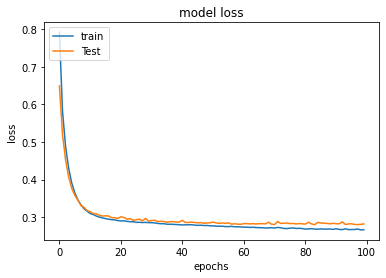

In [40]:
#summarize history for loss/ makes graph for train and test loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train', 'Test'], loc='upper left')
plt.show()